In [1]:
import time
import ROOT
import math
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from root_pandas import read_root
from __future__ import division
from statsmodels.stats.proportion import proportion_confint
%run functions.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def geteff(nRec, nEvt):
    y = []
    yerr = []
    for i in range(0, len(nEvt)):
        if nEvt[i] == 0:
            y.append(0)
            yerr.append([0,0])
        else:
            y.append(nRec[i] / nEvt[i])
            a = abs(proportion_confint(nRec[i], nEvt[i], 1 - 0.68, 'jeffreys') - nRec[i] / nEvt[i])
            yerr.append(a)
    return y, np.asarray(yerr).T

In [3]:
def getDataAll(inputFiles):
    cols = []
    scalar = []
    scalar.append('event')
    cols.append('all_truthNComponent')
    cols.append('all_truthE')
    cols.append('all_truthEta')

    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [4]:
def getDataMatched(inputFiles):
    cols = []
    scalar = []
    scalar.append('event')
    cols.append('matched_truthNComponent')
    cols.append('matched_truthE')
    cols.append('matched_truthEta')

    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [27]:
file1 = ["$HOME/EIC/output/allsi/624.root"]
file2 = ["$HOME/EIC/output/sphenix/619.root"]

In [28]:
a = getDataAll(file1)
b = getDataMatched(file1)
a2 = getDataAll(file2)
b2 = getDataMatched(file2)


Processed $HOME/EIC/output/allsi/624.root in 5.3 seconds

Processed $HOME/EIC/output/allsi/624.root in 5.0 seconds

Processed $HOME/EIC/output/sphenix/619.root in 1.1 seconds

Processed $HOME/EIC/output/sphenix/619.root in 0.9 seconds


In [7]:
# check if there is any jet in "matched" but not in "all"
for i in range(0, 3001):
    match = np.asarray(b['matched_truthEta'])[i]
    if i != 0 and i % 1000 == 0:
        print "checked", i, "jets"
    if math.isnan(match) == False:
        for j in range(i, len(a)):
            alll = np.asarray(a['all_truthEta'])[j]
            if match == alll:
                break
            if j == len(a)-1:
                print b.loc[[i]]

checked 1000 jets
checked 2000 jets
checked 3000 jets
checked 4000 jets
checked 5000 jets
checked 6000 jets
checked 7000 jets
checked 8000 jets
checked 9000 jets
checked 10000 jets


In [29]:
def drop(df): # drop rows with duplicated "matched" jets
    row_dup = []
    for i in range(0, len(df)):
        match = np.asarray(df['matched_truthEta'])[i]
        if i < len(df)-20:
            end = i + 21
        else:
            end = len(df)
        for j in range(i+1, end):
            match2 = np.asarray(df['matched_truthEta'])[j]
            if match == match2:
                #print b.loc[[i]]
                #print b.loc[[j]]
                row_dup.append(i)
    #print row_dup
    print len(row_dup), "pairs of duplicated matched jets found"
    df0 = df.drop(row_dup)
    return df0

In [30]:
b0 = drop(b)
b20 = drop(b2)

30840 pairs of duplicated matched jets found
2323 pairs of duplicated matched jets found


In [31]:
a1 = applyCut(a, 'all_truthNComponent > 1', 'all_truthNComponent')
a1 = applyCut(a1, 'all_truthE > 5', 'all_truthE')

all_truthNComponent 1512162  fraction kept: 83.2
all_truthE 902129  fraction kept: 59.7


In [32]:
b1 = applyCut(b0, 'matched_truthNComponent > 1', 'matched_truthNComponent')
b1 = applyCut(b1, 'matched_truthE > 5', 'matched_truthE')

matched_truthNComponent 883192  fraction kept: 81.6
matched_truthE 647586  fraction kept: 73.3


In [33]:
a21 = applyCut(a2, 'all_truthNComponent > 1', 'all_truthNComponent')
a21 = applyCut(a21, 'all_truthE > 5', 'all_truthE')

all_truthNComponent 303052  fraction kept: 83.2
all_truthE 180883  fraction kept: 59.7


In [34]:
b21 = applyCut(b20, 'matched_truthNComponent > 1', 'matched_truthNComponent')
b21 = applyCut(b21, 'matched_truthE > 5', 'matched_truthE')

matched_truthNComponent 81151  fraction kept: 88.3
matched_truthE 49032  fraction kept: 60.4


In [35]:
etaedges = np.arange(-4.0, 4.1, 0.1)
etaedges2 = np.arange(-1.1, 1.2, 0.1)

In [36]:
a_arr = partitionEta(a, etaedges, etaname = 'all_truthEta')
b_arr = partitionEta(b0, etaedges, etaname = 'matched_truthEta')

-4.0 < all_truthEta < -3.9 3  fraction kept: 0.0
-3.9 < all_truthEta < -3.8 14  fraction kept: 0.0
-3.8 < all_truthEta < -3.6999999999999997 14  fraction kept: 0.0
-3.6999999999999997 < all_truthEta < -3.5999999999999996 60  fraction kept: 0.0
-3.5999999999999996 < all_truthEta < -3.4999999999999996 123  fraction kept: 0.0
-3.4999999999999996 < all_truthEta < -3.3999999999999995 151  fraction kept: 0.0
-3.3999999999999995 < all_truthEta < -3.2999999999999994 244  fraction kept: 0.0
-3.2999999999999994 < all_truthEta < -3.1999999999999993 336  fraction kept: 0.0
-3.1999999999999993 < all_truthEta < -3.099999999999999 517  fraction kept: 0.0
-3.099999999999999 < all_truthEta < -2.999999999999999 703  fraction kept: 0.0
-2.999999999999999 < all_truthEta < -2.899999999999999 937  fraction kept: 0.1
-2.899999999999999 < all_truthEta < -2.799999999999999 1217  fraction kept: 0.1
-2.799999999999999 < all_truthEta < -2.699999999999999 1549  fraction kept: 0.1
-2.699999999999999 < all_truthEta 

-1.2999999999999976 < matched_truthEta < -1.1999999999999975 9183  fraction kept: 0.8
-1.1999999999999975 < matched_truthEta < -1.0999999999999974 9536  fraction kept: 0.9
-1.0999999999999974 < matched_truthEta < -0.9999999999999973 10339  fraction kept: 1.0
-0.9999999999999973 < matched_truthEta < -0.8999999999999972 11086  fraction kept: 1.0
-0.8999999999999972 < matched_truthEta < -0.7999999999999972 11567  fraction kept: 1.1
-0.7999999999999972 < matched_truthEta < -0.6999999999999971 12109  fraction kept: 1.1
-0.6999999999999971 < matched_truthEta < -0.599999999999997 12717  fraction kept: 1.2
-0.599999999999997 < matched_truthEta < -0.4999999999999969 13250  fraction kept: 1.2
-0.4999999999999969 < matched_truthEta < -0.3999999999999968 14182  fraction kept: 1.3
-0.3999999999999968 < matched_truthEta < -0.2999999999999967 14770  fraction kept: 1.4
-0.2999999999999967 < matched_truthEta < -0.19999999999999662 15696  fraction kept: 1.5
-0.19999999999999662 < matched_truthEta < -0.0

In [37]:
a1_arr = partitionEta(a1, etaedges, etaname = 'all_truthEta')
b1_arr = partitionEta(b1, etaedges, etaname = 'matched_truthEta')

-4.0 < all_truthEta < -3.9 1  fraction kept: 0.0
-3.9 < all_truthEta < -3.8 6  fraction kept: 0.0
-3.8 < all_truthEta < -3.6999999999999997 8  fraction kept: 0.0
-3.6999999999999997 < all_truthEta < -3.5999999999999996 24  fraction kept: 0.0
-3.5999999999999996 < all_truthEta < -3.4999999999999996 74  fraction kept: 0.0
-3.4999999999999996 < all_truthEta < -3.3999999999999995 84  fraction kept: 0.0
-3.3999999999999995 < all_truthEta < -3.2999999999999994 136  fraction kept: 0.0
-3.2999999999999994 < all_truthEta < -3.1999999999999993 191  fraction kept: 0.0
-3.1999999999999993 < all_truthEta < -3.099999999999999 293  fraction kept: 0.0
-3.099999999999999 < all_truthEta < -2.999999999999999 443  fraction kept: 0.0
-2.999999999999999 < all_truthEta < -2.899999999999999 640  fraction kept: 0.1
-2.899999999999999 < all_truthEta < -2.799999999999999 789  fraction kept: 0.1
-2.799999999999999 < all_truthEta < -2.699999999999999 1000  fraction kept: 0.1
-2.699999999999999 < all_truthEta < -2.

-0.8999999999999972 < matched_truthEta < -0.7999999999999972 7145  fraction kept: 1.1
-0.7999999999999972 < matched_truthEta < -0.6999999999999971 7086  fraction kept: 1.1
-0.6999999999999971 < matched_truthEta < -0.599999999999997 7102  fraction kept: 1.1
-0.599999999999997 < matched_truthEta < -0.4999999999999969 7012  fraction kept: 1.1
-0.4999999999999969 < matched_truthEta < -0.3999999999999968 7165  fraction kept: 1.1
-0.3999999999999968 < matched_truthEta < -0.2999999999999967 7074  fraction kept: 1.1
-0.2999999999999967 < matched_truthEta < -0.19999999999999662 7157  fraction kept: 1.1
-0.19999999999999662 < matched_truthEta < -0.09999999999999654 7424  fraction kept: 1.1
-0.09999999999999654 < matched_truthEta < 3.552713678800501e-15 7365  fraction kept: 1.1
3.552713678800501e-15 < matched_truthEta < 0.1000000000000032 7973  fraction kept: 1.2
0.1000000000000032 < matched_truthEta < 0.20000000000000373 8094  fraction kept: 1.2
0.20000000000000373 < matched_truthEta < 0.3000000

In [49]:
a2_arr = partitionEta(a2, etaedges2, etaname = 'all_truthEta')
b2_arr = partitionEta(b20, etaedges2, etaname = 'matched_truthEta')

-1.1 < all_truthEta < -1.0 3169  fraction kept: 0.9
-1.0 < all_truthEta < -0.8999999999999999 3302  fraction kept: 0.9
-0.8999999999999999 < all_truthEta < -0.7999999999999998 3464  fraction kept: 1.0
-0.7999999999999998 < all_truthEta < -0.6999999999999997 3749  fraction kept: 1.0
-0.6999999999999997 < all_truthEta < -0.5999999999999996 3984  fraction kept: 1.1
-0.5999999999999996 < all_truthEta < -0.49999999999999956 4153  fraction kept: 1.1
-0.49999999999999956 < all_truthEta < -0.39999999999999947 4383  fraction kept: 1.2
-0.39999999999999947 < all_truthEta < -0.2999999999999994 4518  fraction kept: 1.2
-0.2999999999999994 < all_truthEta < -0.1999999999999993 4873  fraction kept: 1.3
-0.1999999999999993 < all_truthEta < -0.0999999999999992 5030  fraction kept: 1.4
-0.0999999999999992 < all_truthEta < 8.881784197001252e-16 5299  fraction kept: 1.5
8.881784197001252e-16 < all_truthEta < 0.10000000000000098 5397  fraction kept: 1.5
0.10000000000000098 < all_truthEta < 0.20000000000000

In [50]:
a21_arr = partitionEta(a21, etaedges2, etaname = 'all_truthEta')
b21_arr = partitionEta(b21, etaedges2, etaname = 'matched_truthEta')

-1.1 < all_truthEta < -1.0 1489  fraction kept: 0.8
-1.0 < all_truthEta < -0.8999999999999999 1584  fraction kept: 0.9
-0.8999999999999999 < all_truthEta < -0.7999999999999998 1534  fraction kept: 0.8
-0.7999999999999998 < all_truthEta < -0.6999999999999997 1551  fraction kept: 0.9
-0.6999999999999997 < all_truthEta < -0.5999999999999996 1569  fraction kept: 0.9
-0.5999999999999996 < all_truthEta < -0.49999999999999956 1517  fraction kept: 0.8
-0.49999999999999956 < all_truthEta < -0.39999999999999947 1490  fraction kept: 0.8
-0.39999999999999947 < all_truthEta < -0.2999999999999994 1514  fraction kept: 0.8
-0.2999999999999994 < all_truthEta < -0.1999999999999993 1571  fraction kept: 0.9
-0.1999999999999993 < all_truthEta < -0.0999999999999992 1650  fraction kept: 0.9
-0.0999999999999992 < all_truthEta < 8.881784197001252e-16 1659  fraction kept: 0.9
8.881784197001252e-16 < all_truthEta < 0.10000000000000098 1667  fraction kept: 0.9
0.10000000000000098 < all_truthEta < 0.20000000000000

In [51]:
x1 = np.arange(-3.95, 4.05, 0.1)
x2 = np.arange(-1.05, 1.15, 0.1)

In [52]:
nRec = []
nEvt = []
for i in range(0, len(etaedges)-1):
    nRec.append(len(b_arr[i]))
    nEvt.append(len(a_arr[i]))

In [53]:
nRec_cut = []
nEvt_cut = []
for i in range(0, len(etaedges)-1):
    nRec_cut.append(len(b1_arr[i]))
    nEvt_cut.append(len(a1_arr[i]))

In [54]:
nRec2 = []
nEvt2 = []
for i in range(0, len(etaedges2)-1):
    nRec2.append(len(b2_arr[i]))
    nEvt2.append(len(a2_arr[i]))

In [55]:
nRec2_cut = []
nEvt2_cut = []
for i in range(0, len(etaedges2)-1):
    nRec2_cut.append(len(b21_arr[i]))
    nEvt2_cut.append(len(a21_arr[i]))

In [56]:
y1, yerr1 = geteff(np.asarray(nRec), np.asarray(nEvt))
y2, yerr2 = geteff(np.asarray(nRec2), np.asarray(nEvt2))

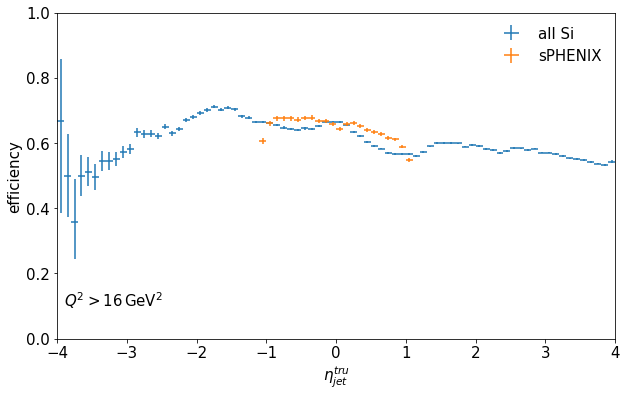

In [57]:
fig = plt.figure(figsize=(10,6))
plt.errorbar(x1, y1, xerr=0.05, yerr=yerr1, fmt='none', label='all Si')
plt.errorbar(x2, y2, xerr=0.05, yerr=yerr2, fmt='none', label='sPHENIX')
plt.xlim(left=-4, right=4)
plt.ylim(bottom=0, top=1)
plt.xlabel('$\eta^{tru}_{jet}$', fontsize=15)
plt.ylabel('efficiency', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(2.5, 0.1, '$Q^2 > 16 \, \mathrm{GeV^2}$', fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.savefig('images/eff_no_cut.png', bbox_inches='tight')

In [58]:
y1, yerr1 = geteff(np.asarray(nRec_cut), np.asarray(nEvt_cut))
y2, yerr2 = geteff(np.asarray(nRec2_cut), np.asarray(nEvt2_cut))

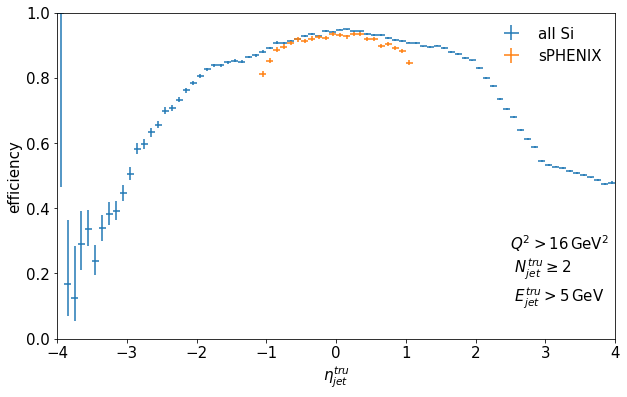

In [59]:
fig = plt.figure(figsize=(10,6))
plt.errorbar(x1, y1, xerr=0.05, yerr=yerr1, fmt='none', label='all Si')
plt.errorbar(x2, y2, xerr=0.05, yerr=yerr2, fmt='none', label='sPHENIX')
plt.xlim(left=-4, right=4)
plt.ylim(bottom=0, top=1)
plt.xlabel('$\eta^{tru}_{jet}$', fontsize=15)
plt.ylabel('efficiency', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(2.5, 0.1, '$Q^2 > 16 \, \mathrm{GeV^2}$ \n $N^{tru}_{jet} \geq 2$ \n $E^{tru}_{jet} > 5 \, \mathrm{GeV}$', fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.savefig('images/eff1.png', bbox_inches='tight')